## Cleaning

In [238]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

In [219]:
# Load dataset
districts = pd.read_csv('DistrictCorrespondingZips.csv')
# Rename columns
districts = districts.rename(columns={'ZipCode': 'ZipCode'})
# Drop duplicate rows
districts.drop_duplicates(inplace=True)

In [88]:
# Load dataset
incomes = pd.read_csv('IncomeLevels.csv')
# Rename columns
incomes = incomes.rename(columns={'Zip Code': 'ZipCode'})

In [74]:
# Merge datasets
income_dst = incomes.merge(districts, on='ZipCode', how='inner')
income_dst.columns = ['ZIPCODE', 'POPULATION', 'AVG. INCOME', 'DISTRICT']

income_dst

,ZIPCODE,POPULATION,AVG. INCOME,DISTRICT
0,2116,"19,682","$60,467.00",D4
1,2114,"10,868","$55,678.00",A1
2,2114,"10,868","$55,678.00",A15
3,2122,"24,548","$40,021.00",C11
4,2127,"29,456","$39,625.00",C6
5,2124,"50,781","$36,025.00",B3
6,2128,"38,413","$31,013.00",A7
7,2119,"23,823","$26,120.00",B2


In [10]:
# Load dataset
weather = pd.read_csv('weather.csv')

weather_cln = weather.loc[:,['DATE', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN']]

# Convert to datetime
weather_cln['DATE'] = pd.to_datetime(weather_cln['DATE'], format='%Y-%m-%d').dt.date
weather_cln.head()

,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,2015-01-01,0.00,0.0,26,33,22
1,2015-01-02,0.00,0.0,34,41,31
2,2015-01-03,0.62,1.4,28,37,22
3,2015-01-04,0.57,0.0,38,52,35
4,2015-01-05,0.00,0.0,40,50,17


In [229]:
# Load dataset
crime = pd.read_csv('crime.csv',encoding='latin1', low_memory=False)
# Change NaN values to N
crime['SHOOTING'] = crime['SHOOTING'].replace(np.nan, 'N')

crime_cln = crime.loc[:,['INCIDENT_NUMBER', 'OFFENSE_CODE_GROUP', 'DISTRICT', 'SHOOTING', 'OCCURRED_ON_DATE', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', ]]
crime_cln

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,HOUR,UCR_PART
0,I182080058,Disorderly Conduct,E18,N,2018-10-03 20:13:00,Wednesday,20,Part Two
1,I182080053,Property Lost,D14,N,2018-08-30 20:00:00,Thursday,20,Part Three
2,I182080052,Other,B2,N,2018-10-03 19:20:00,Wednesday,19,Part Two
3,I182080051,Aggravated Assault,A1,N,2018-10-03 20:00:00,Wednesday,20,Part One
4,I182080050,Aircraft,A7,N,2018-10-03 20:49:00,Wednesday,20,Part Three
...,...,...,...,...,...,...,...,...
327815,I050310906-00,Warrant Arrests,D4,N,2016-06-05 17:25:00,Sunday,17,Part Three
327816,I030217815-08,Homicide,E18,N,2015-07-09 13:38:00,Thursday,13,Part One
327817,I030217815-08,Warrant Arrests,E18,N,2015-07-09 13:38:00,Thursday,13,Part Three
327818,I010370257-00,Warrant Arrests,E13,N,2016-05-31 19:35:00,Tuesday,19,Part Three


In [230]:
# crime_cln['OCCURRED_ON_DATE'].apply(lambda x: datetime.datetime.date(datetime.datetime.strptime(x, "%Y-%m-%d")))
crime_cln.loc[:,'OCCURRED_ON_DATE'] = pd.to_datetime(crime_cln['OCCURRED_ON_DATE'], format='%Y-%m-%d').dt.date
crime_cln = crime_cln.rename(columns={'OCCURRED_ON_DATE': 'DATE'})
crime_cln.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART
0,I182080058,Disorderly Conduct,E18,N,2018-10-03,Wednesday,20,Part Two
1,I182080053,Property Lost,D14,N,2018-08-30,Thursday,20,Part Three
2,I182080052,Other,B2,N,2018-10-03,Wednesday,19,Part Two
3,I182080051,Aggravated Assault,A1,N,2018-10-03,Wednesday,20,Part One
4,I182080050,Aircraft,A7,N,2018-10-03,Wednesday,20,Part Three


In [13]:
# Merge datasets
weatherCrime = pd.merge(crime_cln, weather_cln, on='DATE', how='inner')
print(weatherCrime.shape)

(327820, 13)


In [14]:
# Drop NaN values 
print(weatherCrime.isnull().values.any())
# null_columns=df.columns[df.isnull().any()]
# print(null_columns)
weatherCrime = weatherCrime.dropna()
print(weatherCrime.isnull().values.any())
print(weatherCrime.shape)

True
False
(325953, 13)


In [225]:
# Merge datasets into a big dataframe 
df = pd.merge(weatherCrime, income_dst, on='DISTRICT', how='inner')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,DATE,DAY_OF_WEEK,HOUR,UCR_PART,PRCP,SNOW,TAVG,TMAX,TMIN,ZIPCODE,POPULATION,AVG. INCOME,AVG. INCOME NUMERIC
0,I182080052,Other,B2,N,2018-10-03,Wednesday,19,Part Two,0.21,0.0,59,64,54,2119,"23,823","$26,120.00",26120.0
1,I182080047,Verbal Disputes,B2,N,2018-10-03,Wednesday,19,Part Three,0.21,0.0,59,64,54,2119,"23,823","$26,120.00",26120.0
2,I182080035,Other,B2,N,2018-10-03,Wednesday,19,Part Two,0.21,0.0,59,64,54,2119,"23,823","$26,120.00",26120.0
3,I182080028,Investigate Property,B2,N,2018-10-03,Wednesday,18,Part Three,0.21,0.0,59,64,54,2119,"23,823","$26,120.00",26120.0
4,I182080027,Verbal Disputes,B2,N,2018-10-03,Wednesday,18,Part Three,0.21,0.0,59,64,54,2119,"23,823","$26,120.00",26120.0


<br>

<br>


# Data Exploration and Analysis

### Incidents and Average Income per District

<font size="3.5">The first exploration that we will try to find is the relationships between the average income  and the incident counts per district. In other words, we will see if there is any kind of connections between those two attributes (districts will only play as a location attribute) such as low average income will lead to high crime incidents. Data visualization is obviously needed, and our first figure will be a column chart of average income per Boston district.</font>

<Figure size 432x288 with 0 Axes>

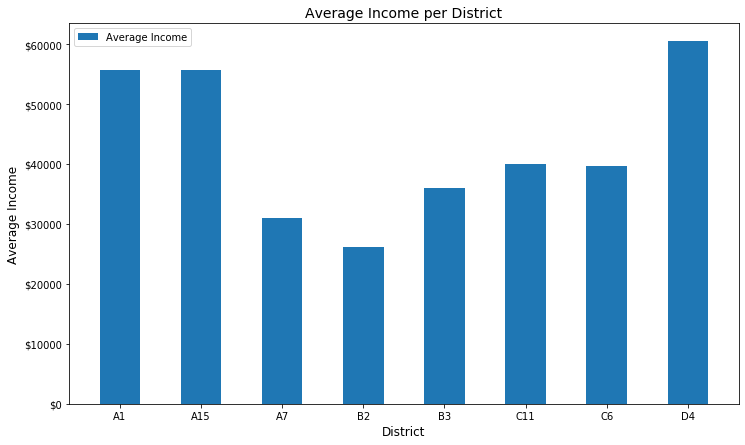

In [81]:
# Drop the comma in the income values and turn them into float
income_list = [i.replace(",","") for i in income_dst["AVG. INCOME"].values]
avg_income_num = [float(i[1:10]) for i in income_list]
income_dst["AVG. INCOME NUMERIC"] = avg_income_num
# Sort values by district name
income_dst = income_dst.sort_values(by=['DISTRICT'])

# Plotting
fig = plt.figure()
ax = income_dst.plot.bar(x="DISTRICT", y="AVG. INCOME NUMERIC", figsize=(12,7), label="Average Income") 
ax.set_xticklabels(income_dst["DISTRICT"], rotation=360)

# Set ytick labels with the dollar sign 
formatter = ticker.FormatStrFormatter('$%1.0f') 
ax.yaxis.set_major_formatter(formatter)

# Setting labels 
ax.set_title("Average Income per District", size=14)
ax.set_xlabel("District", size=12)
ax.set_ylabel("Average Income", size=12)
ax.legend()
ax.autoscale(tight=False)
plt.show()



<br>

<font size="3.5">The second figure will also be a column chart but of incident count per Boston district. Before jumping into plotting the data out with matplotlib, a new dataframe will be created using .groupby() method to catch the total number of incidents in each district.</font>

<Figure size 432x288 with 0 Axes>

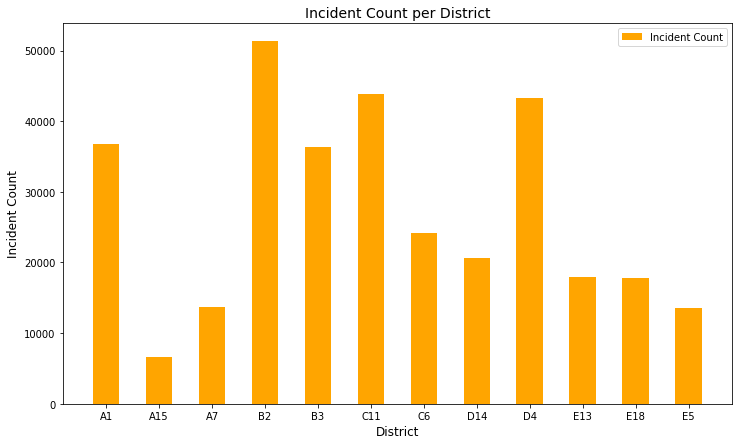

array([36735,  6663, 13634, 51288, 36400, 43817, 24190, 20632, 43338,
       17981, 17825, 13543])

In [127]:
# Create a new dataframe with incident counts per district
incident_count = crime_cln.groupby(['DISTRICT']).size().reset_index(name="Incident Count")

# Plotting
fig = plt.figure()
ax = incident_count.plot.bar(x="DISTRICT", y="Incident Count", color="orange",figsize=(12,7))
ax.set_title("Incident Count per District", size=14)
ax.set_xticklabels(incident_count["DISTRICT"], rotation=360)
ax.set_xlabel("District", size=12)
ax.set_ylabel("Incident Count", size=12)
ax.autoscale(tight=False)
plt.show()

<br>

<font size="3.5">After having two seperate charts, what we notice is that the second chart has more districts, or more attributes than the first chart. This difference is resulted from the lack of measurements for more zipcodes in the original income dataset. Therefore, the third figure will be a combination of the first two, and the set of districts will be similar to that of the first figure. A double column chart will be plotted in order to efficiently visualize the difference between two graphs. The color of the graphs will be kept the same. We will also have a double y-axis.</font>

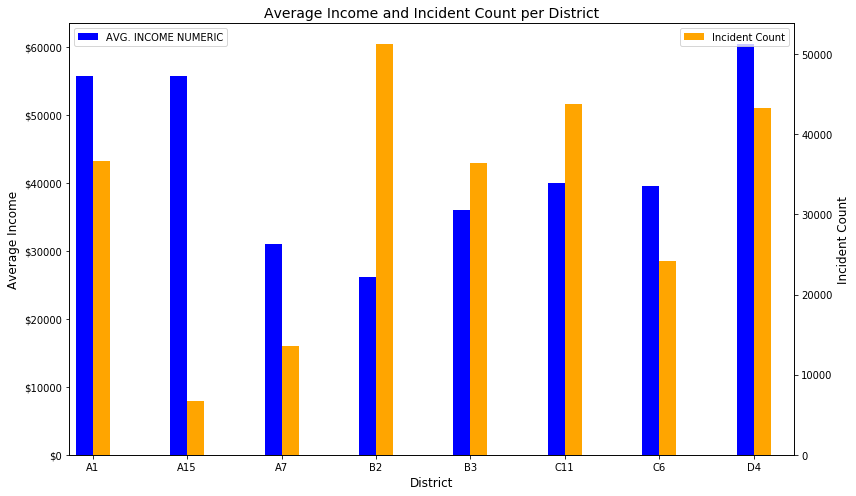

In [192]:
# Create a new dataframe that contains only incident counts of the districts in income_dst
incident_count_cut = incident_count["Incident Count"].values[:7]
incident_count_cut = np.append(incident_count_cut, incident_count["Incident Count"].values[8])
incident_count_cut = pd.DataFrame(incident_count_cut, columns=['Incident Count'])
incident_count_cut = pd.concat([income_dst["DISTRICT"].reset_index(), incident_count_cut], axis=1)

fig, ax1 = plt.subplots(1,1, figsize=(12,7)) # Create matplotlib figure

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

width = 0.18 # Set the bar width

# Plotting for each axes
income_dst.plot.bar(x="DISTRICT", y="AVG. INCOME NUMERIC", color="blue", ax=ax1,
                    width=width, position=1)
ax1.set_xticks([i for i in range(0,8)])
ax1.set_xticklabels(income_dst["DISTRICT"], rotation=360)
formatter = ticker.FormatStrFormatter('$%1.0f') 
ax1.yaxis.set_major_formatter(formatter)
ax1.set_xlabel("District", size=12)
ax1.set_ylabel("Average Income", size=12)
ax1.set_title("Average Income and Incident Count per District", size=14)

incident_count_cut.plot.bar(x="DISTRICT", y="Incident Count", color="orange", ax=ax2,
                       width=width, position=0)
ax2.set_ylabel("Incident Count", size=12)

fig.tight_layout()

plt.show()


<font size="3.5">This graph gives us insight into whether high rates of crime is co-related to income in any dimension(s). According to this graph, there appears to be some correlation between the two, but not a very strong one. District B2, which has the lowest average income in the city, also has the highest number of criminal incidents out of all the districts. Then, if one looks at district A15 and the number of incidents there, one could think that high crime rate is strongly correlated to low incomes. But districts D4 and A1 put an exception to that rule. The average incomes in those two districts are two of the highest in the City, yet the incidents there are higher than most of the districts. Our group is aware that there may be more variables that could predict crime in certain districts based off income but based off our datasets there is no strong correlation.</font>

<br>

### Crime Rate

<font size="3.5">The second exploration will be crime rate in Boston. In this exploration, we will continue to use data visualization with matplotlib and graph analysis just like what we did in the first exploration. This time, we only need one column chart. For the sake of plotting, we will create a new dataframe called "crime_pop" from our "incident_count_cut" dataframe and the population values from "income_dst" dataframe. "crime_pop" will contain the incident counts and the population of each district. We then add a "Crime Rate" column to this dataframe with the formula:</font>
\begin{align}
Crime\ Rate\ & =\ Incident\ Counts\ /\ Population 
\end{align}

<Figure size 432x288 with 0 Axes>

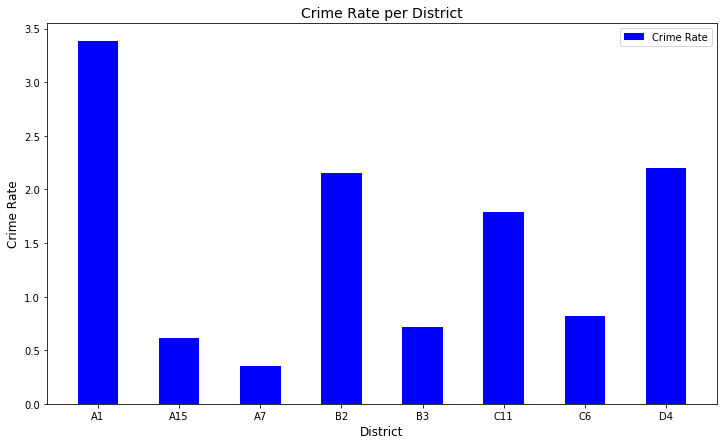

In [210]:
# Population list
pop_list = [i.replace(",","") for i in income_dst["POPULATION"].values]

crime_pop = incident_count_cut
crime_pop["Population"] = pop_list
crime_pop["Crime Rate"] = crime_pop["Incident Count"]/crime_pop["Population"].astype('int')

# Plotting
fig = plt.figure()
ax = crime_pop.plot.bar(x="DISTRICT", y="Crime Rate", color='blue', figsize=(12,7))
ax.set_title("Crime Rate per District", size=14)
ax.set_xticklabels(crime_pop["DISTRICT"], rotation=360)
ax.set_xlabel("District", size=12)
ax.set_ylabel("Crime Rate", size=12)
ax.autoscale(tight=False)
plt.show()

<font size="3.5">The reason why we chose this graph is because it tells us about the crime rate in each district, which we tried to associate with the high population or the median income in that district. This way, we could also figure out how much of a factor income is in the crime. But, as seen in the previous graph, the rule that high income is associated to low crimes was put to rest.
Drawing conclusion from the graph, clearly district A1 has the crime rate out of all the districts with nearly 3.5 crime incidents/person. That is an astonishing rate compared to the lowest rate of just below 0.5 incidents/person in A7 district. Beside A7, B3 and A15 also have one of the lowest crime rates in Boston.
</font>

<br>

### Incidents vs Month

<font size="3.5">Next exploration will be to understand if there is any occurrence betwwen the incident counts and the time of the year. The finding from this data could be related to the season, temperature, or in some extreme and unlikely cases even the local culture. This time, we use a line graph.</font>

In [239]:
crime_cln.index = crime_cln.DATE
crime_cln.groupby(pd.TimeGrouper(freq='M'))

AttributeError: module 'pandas' has no attribute 'TimeGrouper'